# Overall Conclusion - Best Neighborhood in Pittsburgh

## Introduction

- Our team's analysis focuses on the crime arrest records, tree statistics, and restaurant statistics of each neighborhood. Our goal is to determine the most livable neighborhood in Pittsburgh.

## Metric Definition

### Method 1: An Ideal Model based on Matrix Calculation
- How do you define the best? Everyone's idea of the best neighborhood varies because they prioritize different factors. 
- Do you value safety, environment, or entertainment more? 
- The meanings represented by the three datasets we each analyze can be abstracted into safety, environment, and entertainment. Assuming their weights sum up to 1.
  - eg: if you believe safety is more important than environment, which is in turn more important than entertainment, you can assign weights of 0.6, 0.3, and 0.1 respectively. 
  - eg2: If you consider entertainment to be the most important aspect, enjoying exploring restaurants with friends, your weights could be 0.1, 0.1, 0.8.

### Method 2: Top Overlap
- The "best" neighborhood found by us if all three afctors are equally important
- When we filter out the top 20 neighborhood in each of our dataset, there are only one overlapping neighborhood, that's already fair enough for us to report a "best neighborhood" according to our rules



## Partial Data Analysis (Quick Review)(Method 2)

- Since method 2 is easier (less calculation required), let's see how method 2 works.
- Please see the details in our saperated folders.

### Crime Arrest Data Analysis （top 20): 
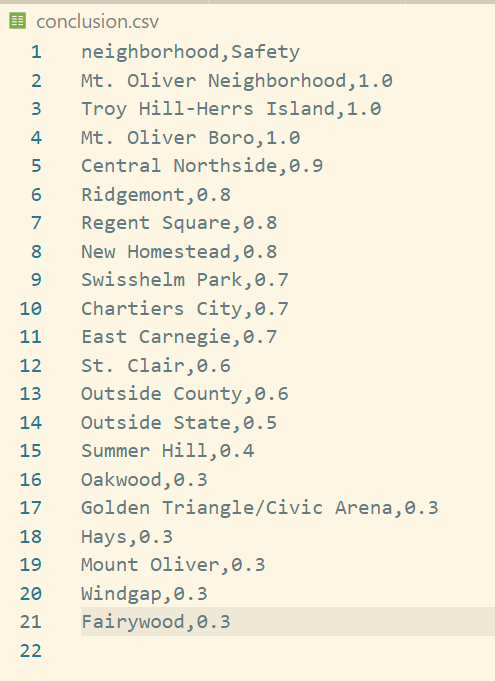

### Tree Distribution Data Analysis （top 20): 
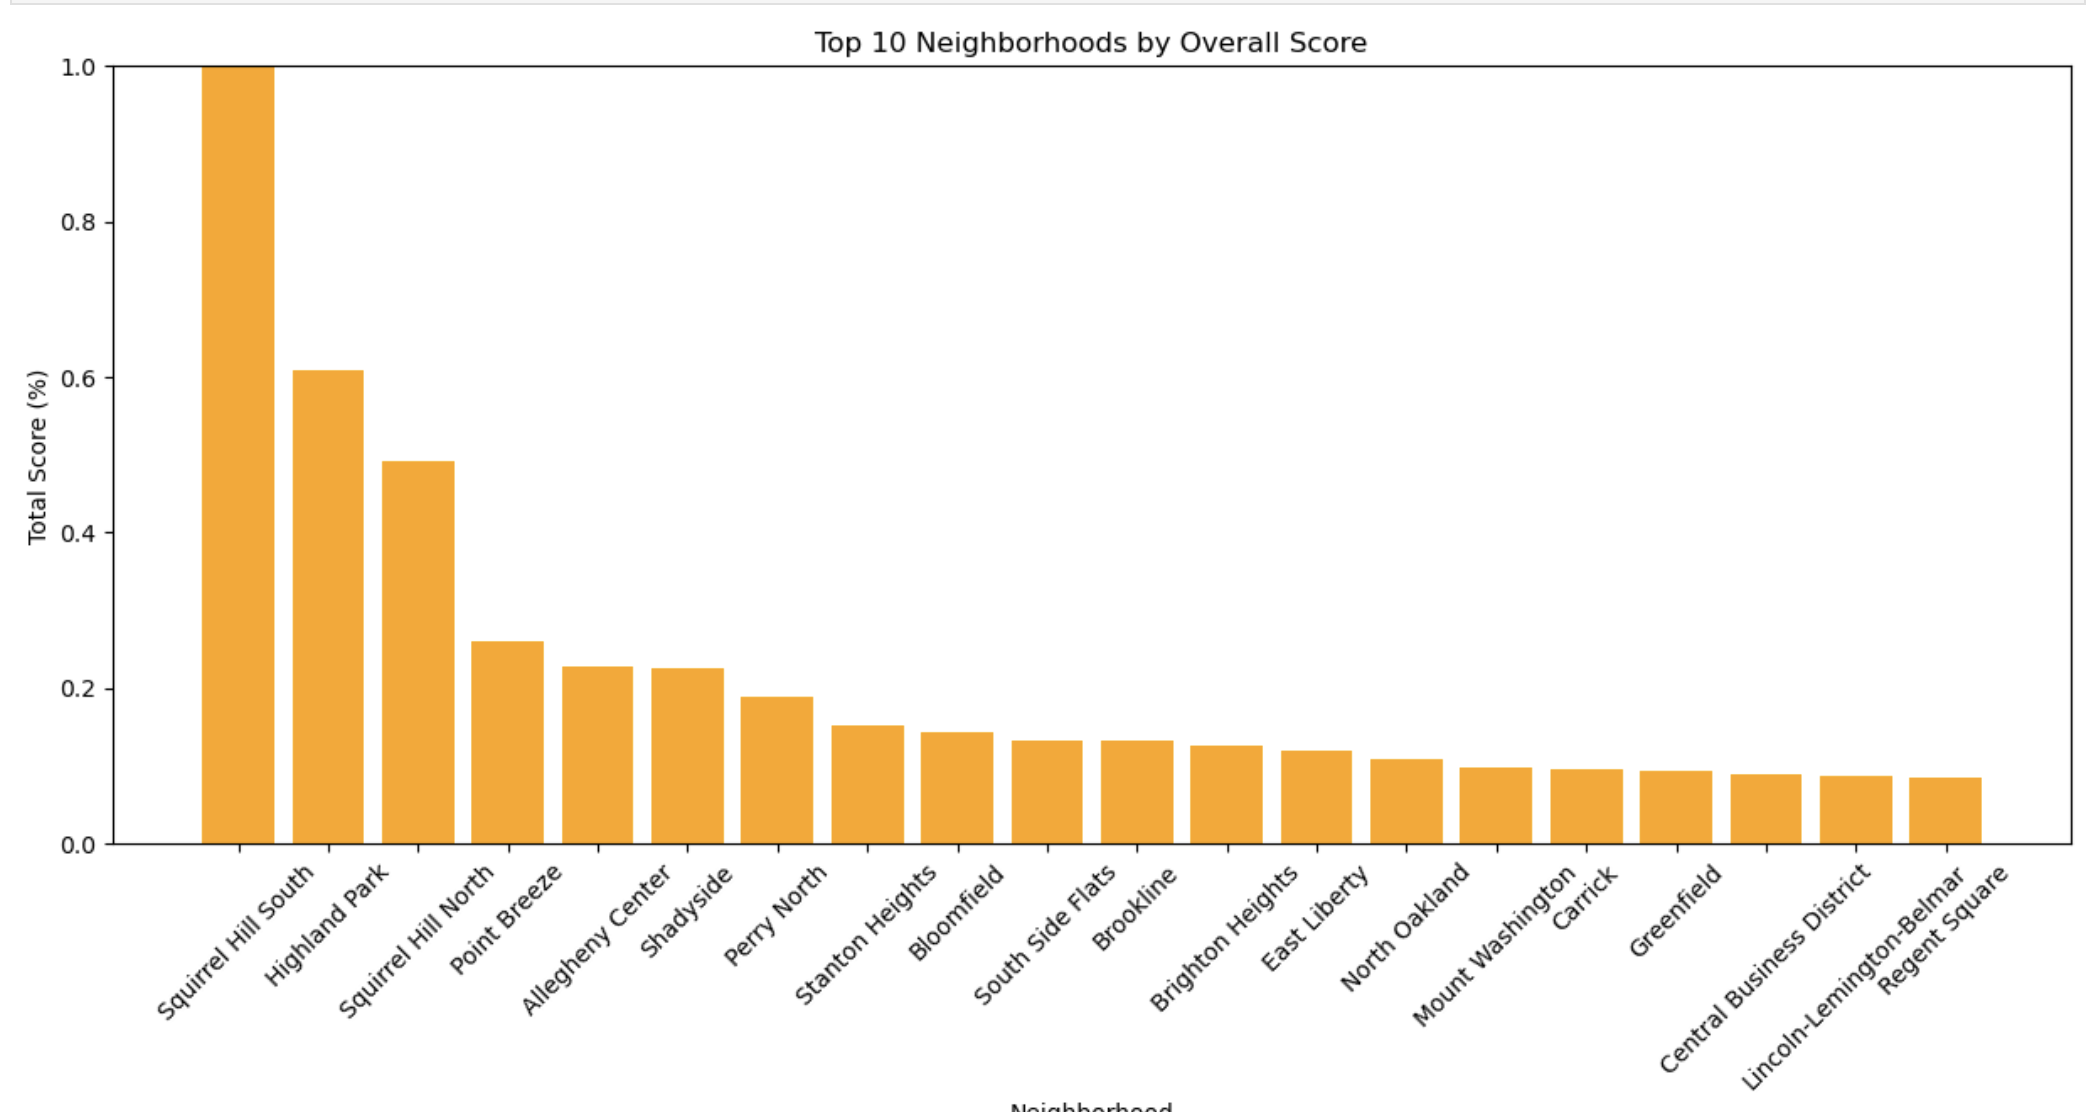

### Restaurant Distribution Data Analysis （top 20): 
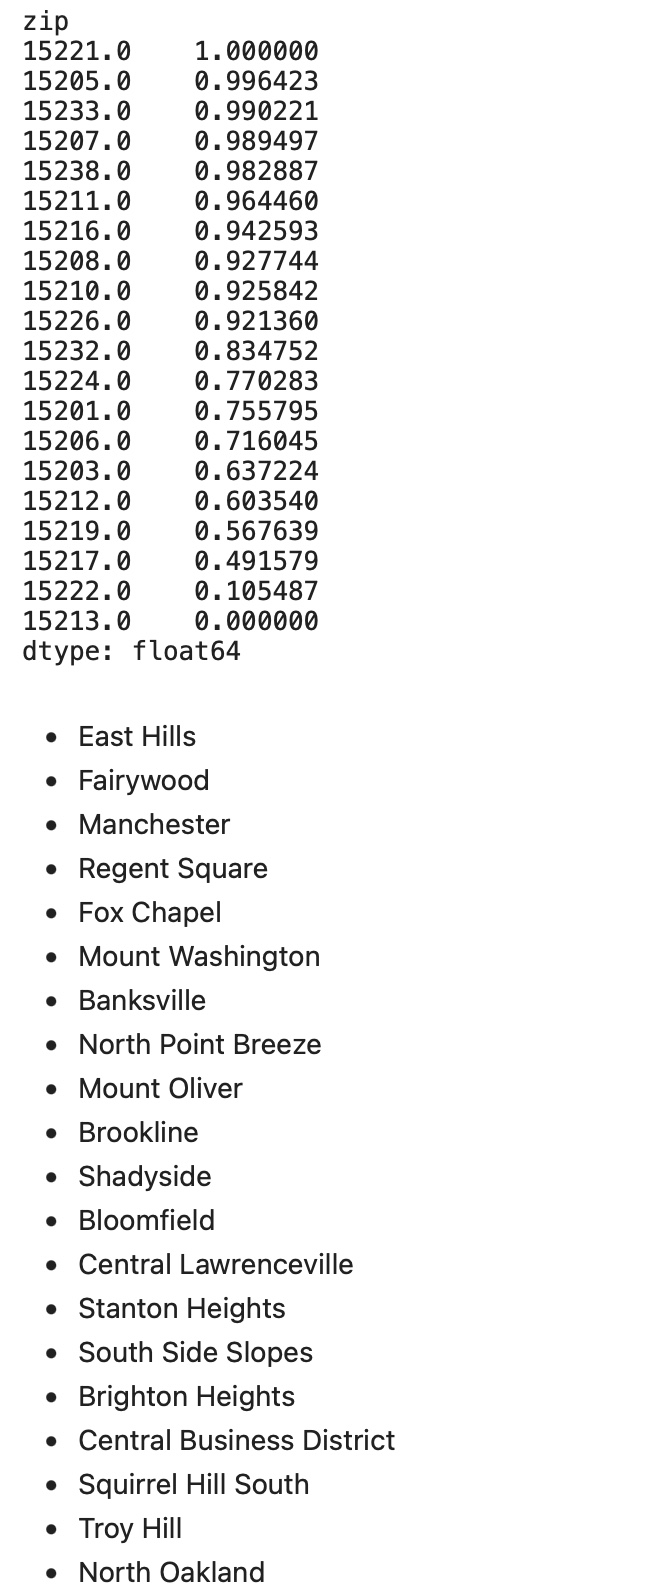

- In this case, I'm exited to introduce the neighborhood best to live is:
  - __Regent Square !!!__
- Reasons:
  -it ranks in the top 8 for safety based on Crime Arrest Data, 
  - in the top 20 for environment based on tree count, 
  - and in the top 4 for entertainment based on Restaurant distribution. 
  - It is also the only neighborhood that overlaps among the top 20 neighborhoods in all three datasets. 

## Combination of Metrics (method 1: Ideal calculation model)

### Explaination of Algorithms

- Let's see how the matrix calculation works.
  - The first matrix is the scores given by each of us. According to each of our dataset, we can define the score of every neighborhood. 
    - i.e. In the crime arrest dataset, I think Mt. Oliver Boro, Troy Hill-Herrs Island, and Mt. Oliver Neighborhood are the safest neighborhoood, so the score I gave to them is 1/1. 
  - The second matrix is the weight the consumers want to give, as I mentioned in Metric definition part, they can give the factors the weight they like to calculate the "best" neighborhood for them. Please notice that the weight should add up to 1 to make the result makes more sense and be able to be compared with other cases of weight distribution.
  - After the matrix multiplication operation, we can get the overall score of each of the neighborhood according to both the given score of our group member's work and the idea weight the consumer would like.

### The model matrix is supposed to be like:

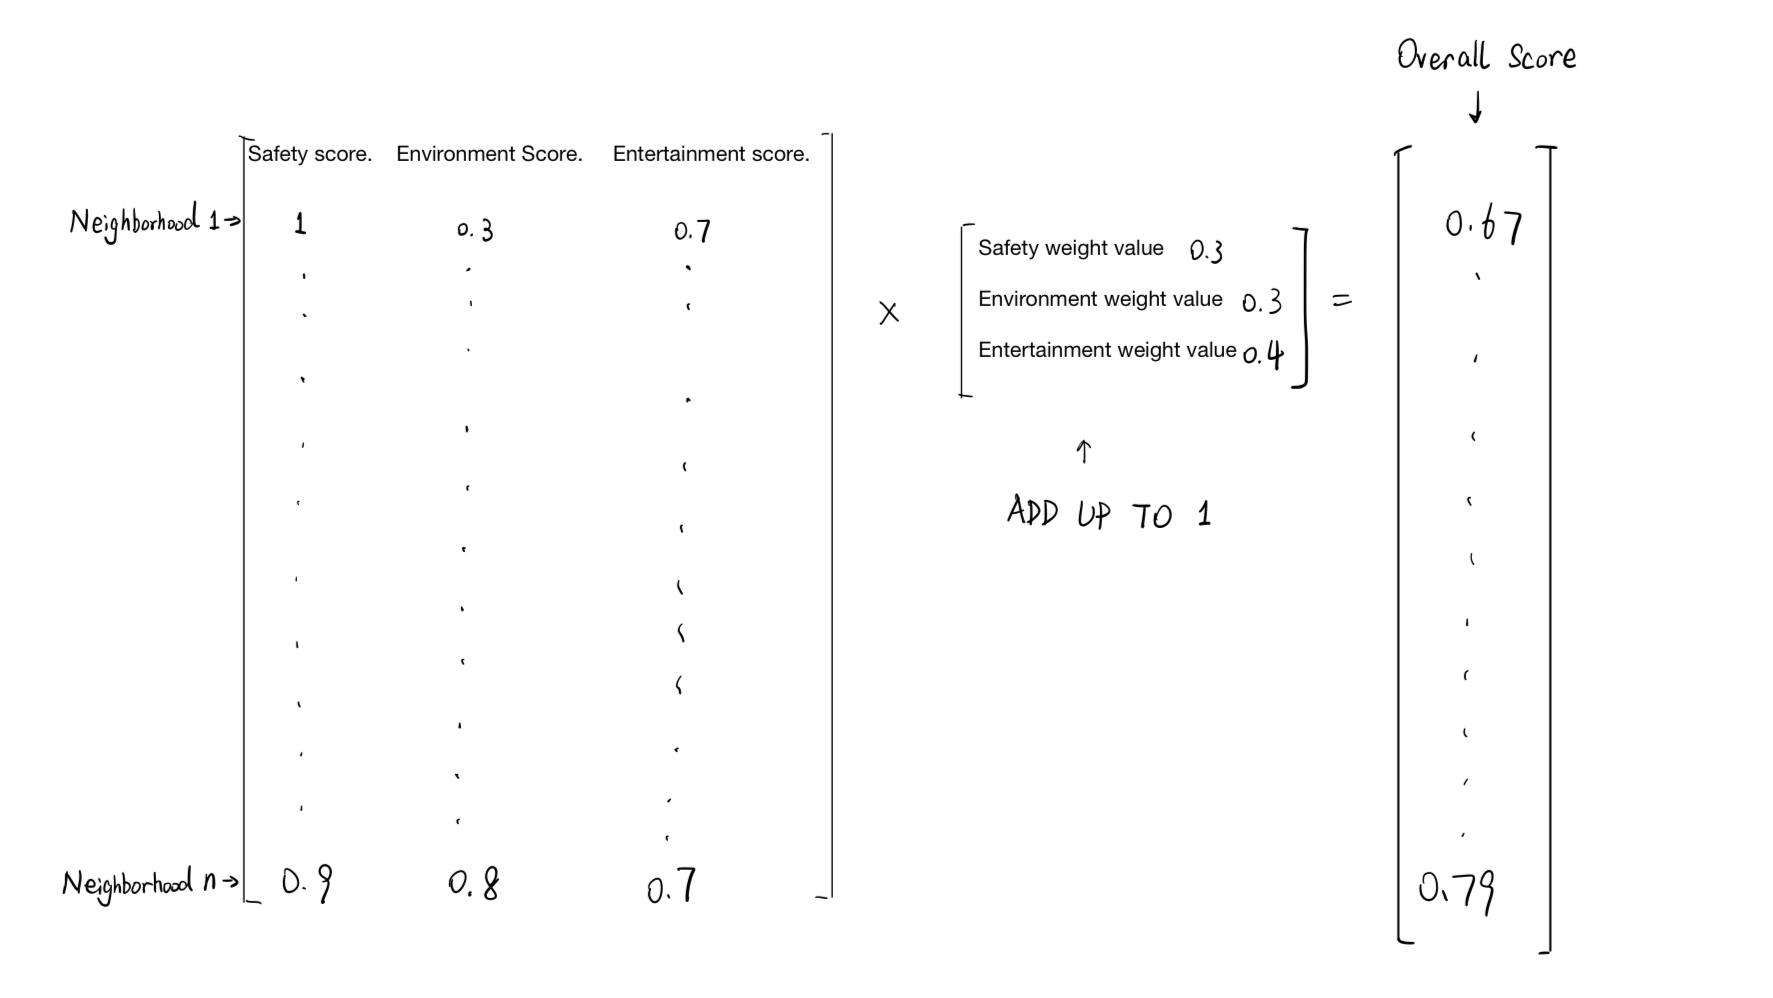

### The partial csv file of score of each neighborhood given by each of us is like:
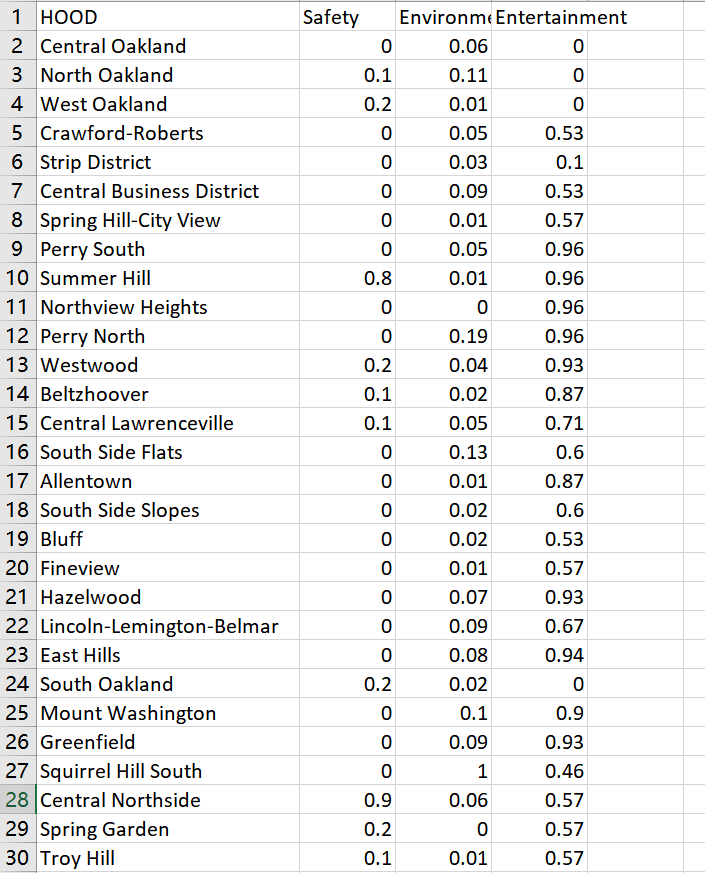

### Codes:


In [17]:
import pandas as pd

# Read the score.csv file
score_df = pd.read_csv('score.csv')

# Function to calculate total score based on weights
def calculate_total_score(row, weights):
    return row['Safety'] * weights['Safety'] + row['Environment'] * weights['Environment'] + row['Entertainment'] * weights['Entertainment']

# Function to validate weights
def validate_weights(safety_weight, environment_weight, entertainment_weight):
    #return sum(weights.values()) == 1.0
    # print("sum up is:" + str(safety_weight + entertainment_weight + entertainment_weight))
    return (not(entertainment_weight <0))

# Get user input for weights
while True:
    try:
        safety_weight = float(input("Enter the weight for Safety (between 0 and 1): "))
        print("safety_weight you just entered was: " + str(safety_weight))
        
        environment_weight = float(input("Enter the weight for Environment (between 0 and 1): "))
        print("environment_weight you just entered was: " + str(environment_weight))
         
       # entertainment_weight = float(input("Enter the weight for Entertainment (between 0 and 1): "))
        entertainment_weight = 1-(safety_weight + environment_weight)
        print("entertainment_weight is calculated by 1-(the other two), which is:" + str(entertainment_weight))
         
      #  weights = {'Safety': safety_weight, 'Environment': environment_weight, 'Entertainment': entertainment_weight}
        if validate_weights(safety_weight, environment_weight, entertainment_weight):
            break
        else:
            print("Weights must add up to 1. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a number between 0 and 1.")

# Calculate total score for each neighborhood
weights = {'Safety': safety_weight, 'Environment': environment_weight, 'Entertainment': entertainment_weight}
score_df['Total Score'] = score_df.apply(calculate_total_score, axis=1, weights=weights)

# Find the neighborhood with the highest total score
best_neighborhood = score_df.loc[score_df['Total Score'].idxmax(), 'HOOD']

# Print the best neighborhood
print("The best neighborhood is:", best_neighborhood)

import pandas as pd

# Read the score.csv file
score_df = pd.read_csv('score.csv')

# Function to calculate total score based on weights
def calculate_total_score(row, weights):
    return row['Safety'] * weights['Safety'] + row['Environment'] * weights['Environment'] + row['Entertainment'] * weights['Entertainment']

# Function to validate weights
def validate_weights(safety_weight, environment_weight, entertainment_weight):
    #return sum(weights.values()) == 1.0
    # print("sum up is:" + str(safety_weight + entertainment_weight + entertainment_weight))
    return (not(entertainment_weight <0))

# Get user input for weights
while True:
    try:
        safety_weight = float(input("Enter the weight for Safety (between 0 and 1): "))
        print("safety_weight you just entered was: " + str(safety_weight))
        
        environment_weight = float(input("Enter the weight for Environment (between 0 and 1): "))
        print("environment_weight you just entered was: " + str(environment_weight))
         
       # entertainment_weight = float(input("Enter the weight for Entertainment (between 0 and 1): "))
        entertainment_weight = 1-(safety_weight + environment_weight)
        print("entertainment_weight is calculated by 1-(the other two), which is:" + str(entertainment_weight))
         
      #  weights = {'Safety': safety_weight, 'Environment': environment_weight, 'Entertainment': entertainment_weight}
        if validate_weights(safety_weight, environment_weight, entertainment_weight):
            break
        else:
            print("Weights must add up to 1. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a number between 0 and 1.")



safety_weight you just entered was: 0.3
environment_weight you just entered was: 0.3
entertainment_weight is calculated by 1-(the other two), which is:0.4
The best neighborhood is: Regent Square


- I tried 0.6:0.3:0.1, and 0.3:0.3:0.4, the result is still Regent Square, I guess it is a good neighborhood
- I also tried 0:0:1, the result is Swisshelm Park and Regent Square, which is exactly the same result in restaurant dataset.


## Best Neighborhood Determination

- __Regent Square__


## Conclusion

- In our conclusion, Regent Square emerges as the most livable neighborhood, as it ranks in the top 8 for safety based on Crime Arrest Data, in the top 20 for environment based on tree count, and in the top 4 for entertainment based on Restaurant distribution. It is also the only neighborhood that overlaps among the top 20 neighborhoods in all three datasets.
- You can also modify your own weight to have different result of your best neighborhood. But in most cases, Regent Square is still the recommendation
